# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('breast_cancer.csv')

## EDA

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- I have to drop the Unnamed column

In [6]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- This is a breast cancer data, so i have to confirmed the ratio of Malignant(M) and Benign(B) in our data
- Benign :- A tumour that is not Cancerous
- Malignant :- A tumour that is Cancerous

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
df.diagnosis.value_counts() / len(df) * 100

diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64

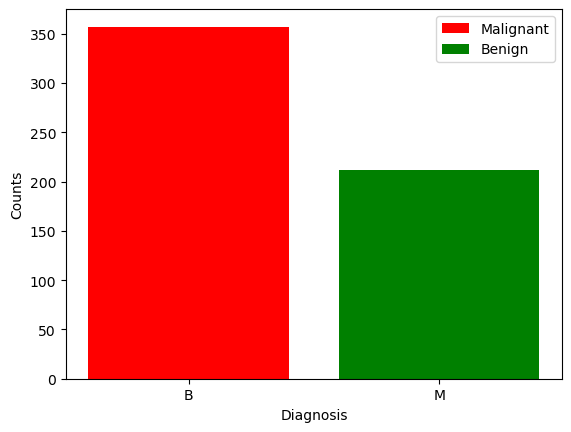

In [10]:
value_counts = df.diagnosis.value_counts()
colors = ['red', 'green']
labels = ['Malignant', 'Benign']  # Adjust based on your actual class labels

bars = plt.bar(value_counts.index, value_counts.values, color=colors)
plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.legend(bars, labels)
plt.show()

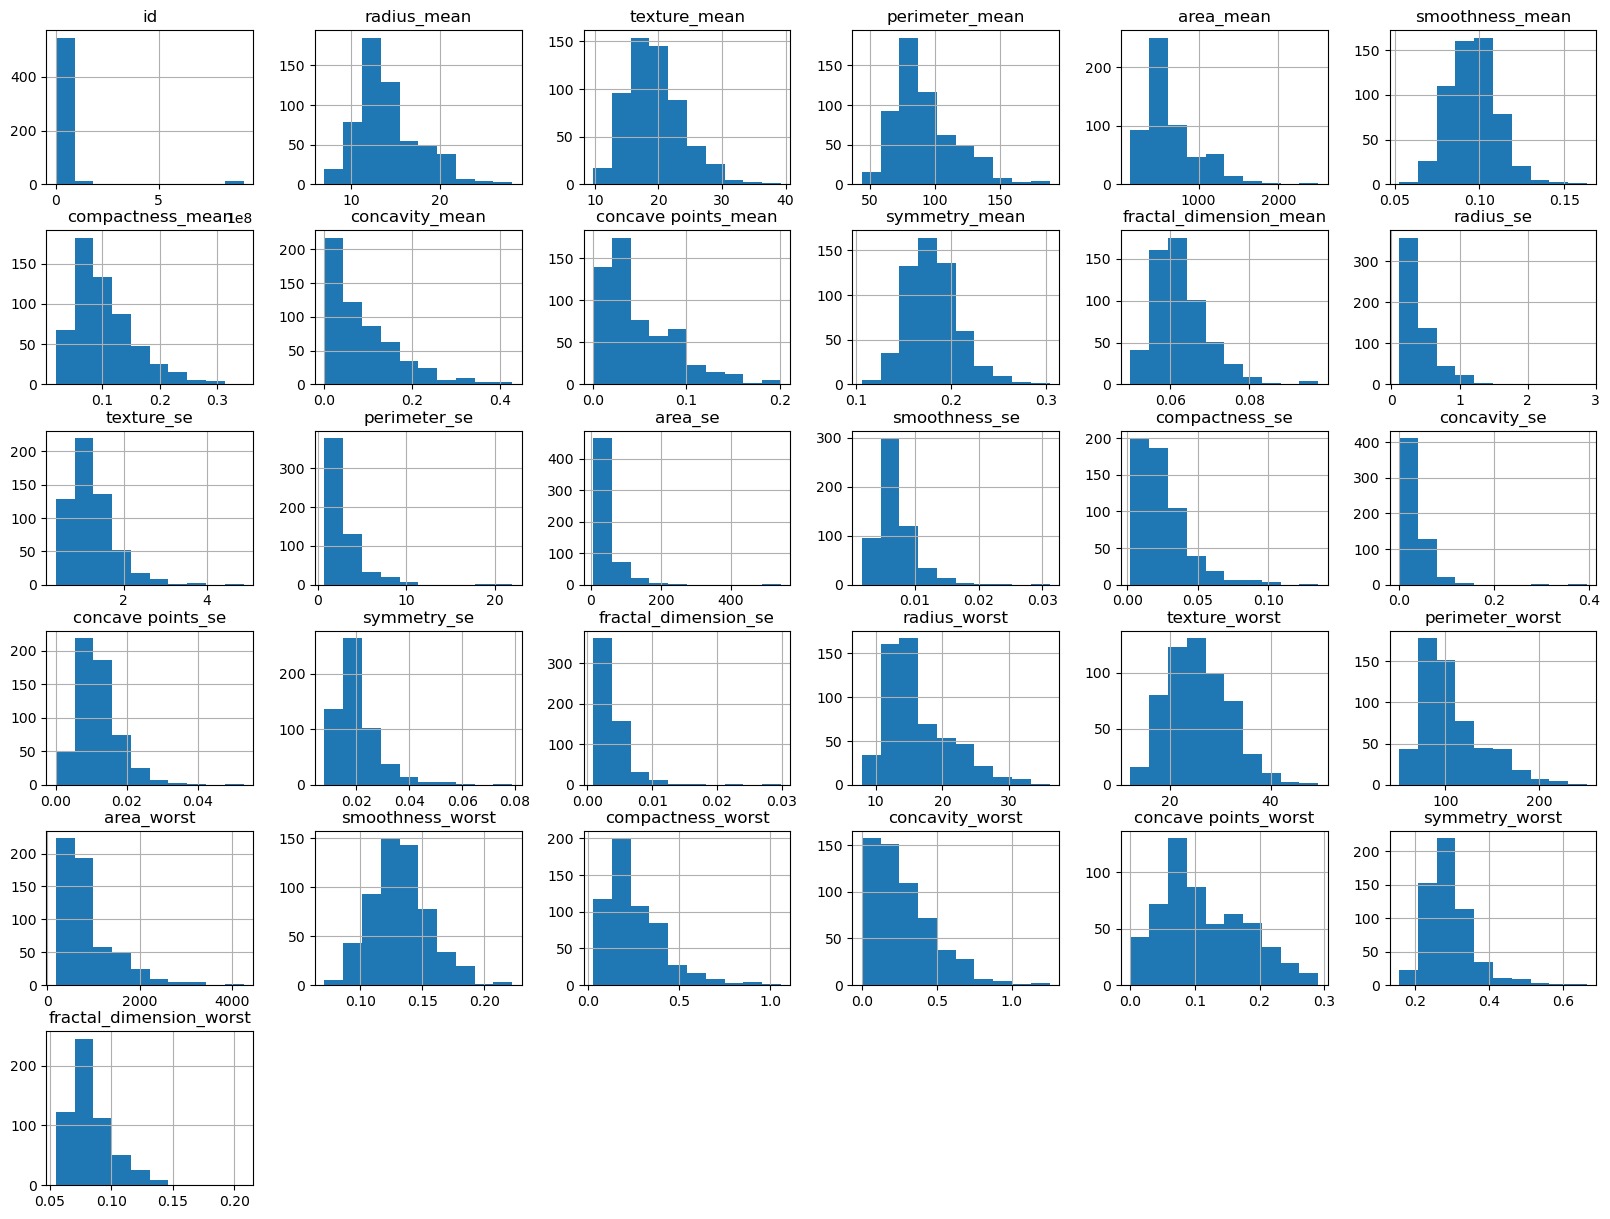

In [11]:
df.hist(figsize=(20, 15))
plt.show()

# Preprocessing

In [12]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [15]:
len(df)

569

In [16]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


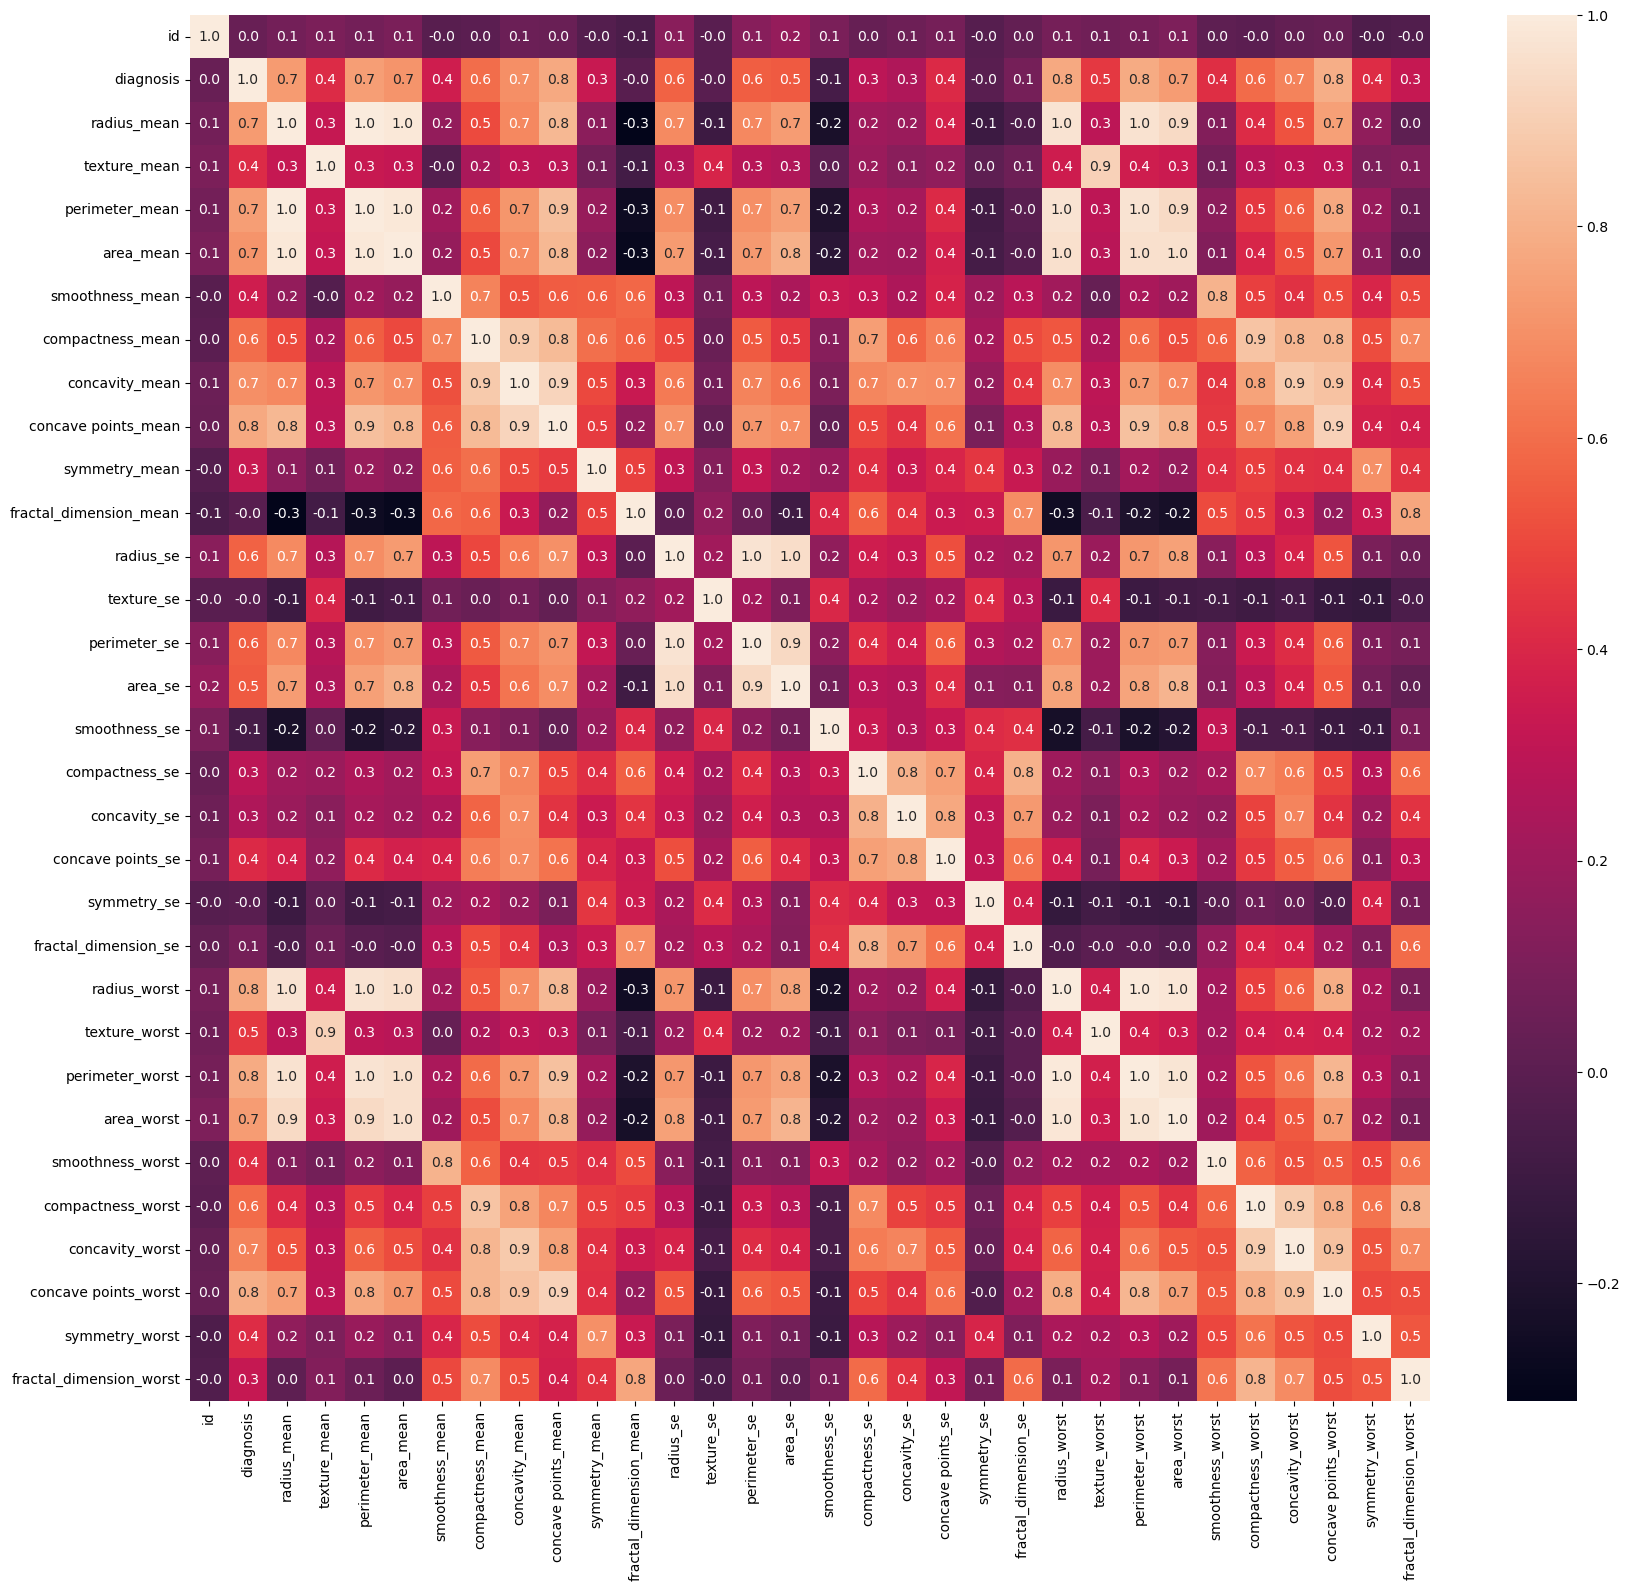

In [17]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [18]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Defining  x and y variable

In [19]:
x = df.drop(df[['id', 'diagnosis']], axis=1)

y = df['diagnosis']

In [20]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Spliting the data

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

- Spliting data, 20% testing and 80% training

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
len(x_train)

455

In [25]:
len(x_train) / len(df) * 100

79.96485061511423

In [26]:
len(x_test) / len(df) * 100

20.035149384885763

# Model training

- I will be using numerous Algorithm to train our data in order to get the best model via accuracy and classicication_metrics
- This best model will go through Dimensionality reduction and HPO
- and will be tested with real time data to see it performance

# LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)

lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [28]:
lr_pred = lr.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score


accuracy_lr = accuracy_score(y_test, lr_pred)

report_lr = classification_report(y_test, lr_pred)




In [30]:
print('Accuracy: ', round(accuracy_lr, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(report_lr)

Accuracy:  96.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth=5, min_samples_split=5, 
                            min_samples_leaf=3, class_weight='balanced', random_state=42, n_jobs=-1, )

rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, n_jobs=-1, random_state=42)

In [32]:
rf_pred = rf.predict(x_test)

rf_pred_proba = rf.predict_proba(x_test)

In [33]:
accuracy_rf = accuracy_score(y_test, rf_pred)

report_rf = classification_report(y_test, rf_pred)

In [34]:
print("Accuracy: ", round(accuracy_rf, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(report_rf)

Accuracy:  93.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        74
           1       0.90      0.90      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



# NAIVE BAYES

In [35]:
from sklearn.naive_bayes import GaussianNB

nb_g = GaussianNB()

nb_g.fit(x_train, y_train)

GaussianNB()

In [36]:
nbg_pred = nb_g.predict(x_test)

In [37]:
accuracy_nbg = accuracy_score(y_test, nbg_pred)

report_nbg = classification_report(y_test, nbg_pred)

In [38]:
print("Accuracy: ", round(accuracy_nbg, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(report_nbg)

Accuracy:  92.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        74
           1       0.90      0.88      0.89        40

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



## SVM

In [39]:
from sklearn.svm import SVC

svm = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', probability=True, random_state=42, cache_size=500)

svm.fit(x_train, y_train)

SVC(cache_size=500, class_weight='balanced', probability=True, random_state=42)

In [40]:
svm_pred = svm.predict(x_test)

In [41]:
svm_accuracy= accuracy_score(y_test, svm_pred)

svm_report = classification_report(y_test, svm_pred)

In [42]:
print("Accuracy: ", round(svm_accuracy, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(svm_report)

Accuracy:  96.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.93      0.95      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## XGboost

In [43]:
from xgboost import XGBClassifier


In [44]:
xgb = XGBClassifier(n_estimators = 200, max_depth=3, learning_rate = 0.05, scale_pos_weight = 357/212,
                    reg_alpha = 0.5, reg_lambda = 2.0, subsample = 0.7, random_state=42)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
xgb_pred = xgb.predict(x_test)

In [46]:
xgb_accuracy= accuracy_score(y_test, xgb_pred)

xgb_report = classification_report(y_test, xgb_pred)

In [47]:
print("Accuracy: ", round(xgb_accuracy, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(xgb_report)

Accuracy:  95.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.93      0.93      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Feature Importance for well perfoming Models

SVM Feature Importance (Permutation Method):
          feature  importance       std
1    texture_mean    0.005263  0.005819
21  texture_worst    0.004386  0.008087
3       area_mean    0.003509  0.005819
23     area_worst    0.003509  0.005819
0     radius_mean    0.000877  0.006140


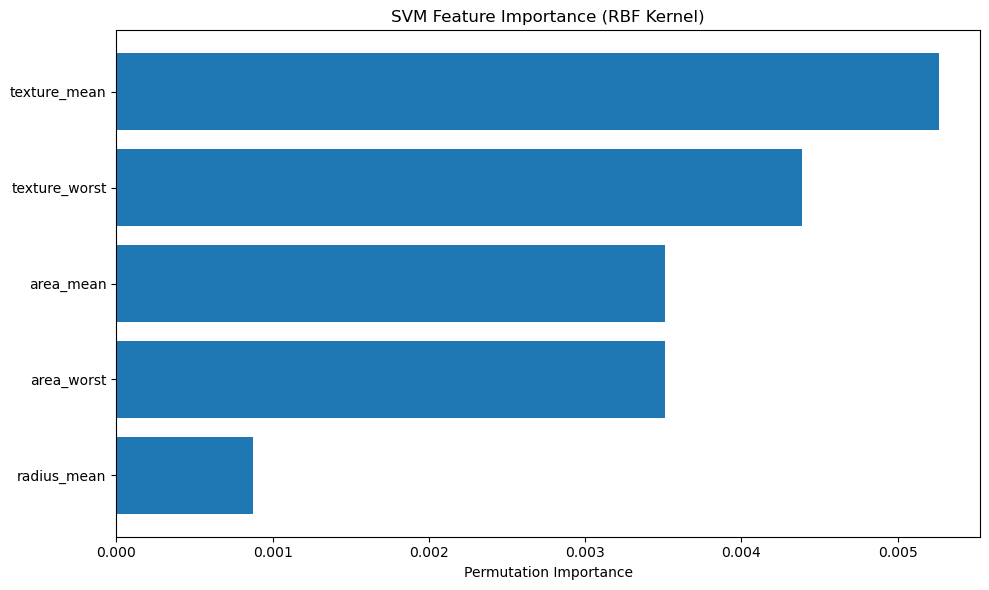

In [48]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(
    svm, x_test, y_test, 
    n_repeats=10, 
    random_state=42
)


svm_importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=False)

print("SVM Feature Importance (Permutation Method):")
print("=" * 50)
print(svm_importance_df.head(5))

# Plot top features
plt.figure(figsize=(10, 6))
top_features = svm_importance_df.head(5)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Permutation Importance')
plt.title('SVM Feature Importance (RBF Kernel)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 Most Important Features for Breast Cancer Detection:
                 feature  importance
22       perimeter_worst    0.342440
27  concave points_worst    0.197548
7    concave points_mean    0.102085
3              area_mean    0.051546
23            area_worst    0.033637


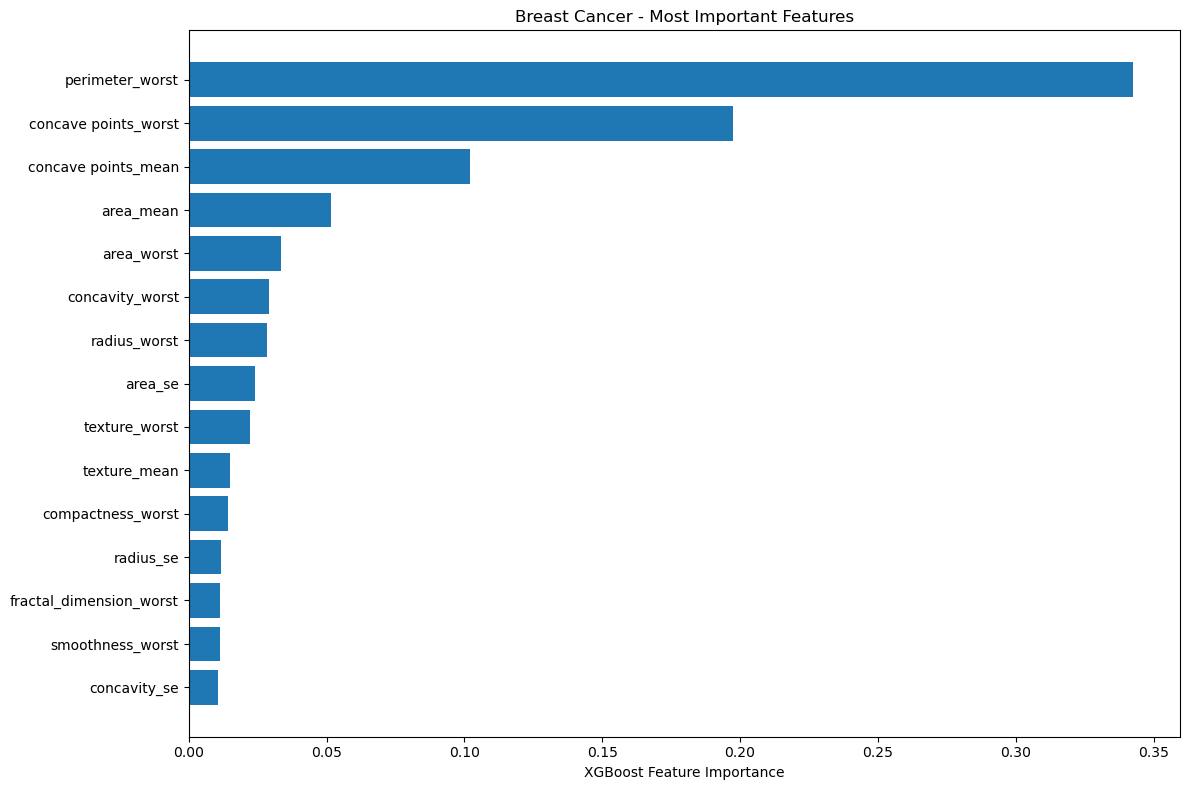

In [49]:
# xgb Feature importance 
importance_df = pd.DataFrame({
    'feature': x.columns,  
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Breast Cancer Detection:")
print(importance_df.head(5))  

 Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'].head(15), importance_df['importance'].head(15))
plt.xlabel('XGBoost Feature Importance')
plt.title('Breast Cancer - Most Important Features')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

# Retrain The models with the top 5 important feature 

Base on this feature importance, i will reduce the feature to this top 5 to see the performance

## XGboost Retrained

In [51]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [52]:
df_xgb = pd.read_csv('breast_cancer.csv')

In [53]:
features = ['perimeter_worst', 'concave points_worst', 'concave points_mean', 'area_mean', 'area_worst']


In [54]:
xgb_x = df[features]

In [55]:
xgb_x.head(3)

,perimeter_worst,concave points_worst,concave points_mean,area_mean,area_worst
0,184.6,0.2654,0.14710,1001.0,2019.0
1,158.8,0.1860,0.07017,1326.0,1956.0
2,152.5,0.2430,0.12790,1203.0,1709.0


In [56]:
xgb_train_x, xgb_test_x, y_train, y_test = train_test_split(xgb_x, y, test_size=0.2, random_state=3)

In [57]:
xgb_sc = StandardScaler()


xgb_train_x = xgb_sc.fit_transform(xgb_train_x)
xgb_test_x = xgb_sc.transform(xgb_test_x)

In [58]:
# xgb2= XGBClassifier(n_estimators = 200, max_depth=3, learning_rate = 0.05)



In [59]:
xgb2 = XGBClassifier(n_estimators = 200, max_depth=3, learning_rate = 0.05, scale_pos_weight = 357/212,
                    reg_alpha = 0.5, reg_lambda = 2.0, subsample = 0.7, random_state=42)


In [60]:
xgb2.fit(xgb_train_x, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
xgb_pred2 = xgb2.predict(xgb_test_x)

In [62]:
xgb_accuracy2= accuracy_score(y_test, xgb_pred2)

xgb_report2 = classification_report(y_test, xgb_pred2)

print("Accuracy: ", round(xgb_accuracy2, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(xgb_report2)

Accuracy:  94.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



# Testing On Unseen data

In [63]:
data = [[57.26,	0.02564,	0.005917,	201.9,	242.2]]

new_df = pd.DataFrame(data, columns=['perimeter_worst', 'concave points_worst', 'concave points_mean', 'area_mean', 'area_worst'])


In [64]:
new_df.head()

,perimeter_worst,concave points_worst,concave points_mean,area_mean,area_worst
0,57.26,0.02564,0.005917,201.9,242.2


In [65]:
new_df  = xgb_sc.transform(new_df)

In [66]:
real_pred = xgb2.predict(new_df)

In [67]:
real_pred

array([0])

# SVM Retrained

In [68]:
svm_feature = ['texture_mean', 'texture_worst', 'area_mean', 'area_worst', 'radius_mean']

x_svm = df[svm_feature]

In [69]:
x_svm.head()

,texture_mean,texture_worst,area_mean,area_worst,radius_mean
0,10.38,17.33,1001.0,2019.0,17.99
1,17.77,23.41,1326.0,1956.0,20.57
2,21.25,25.53,1203.0,1709.0,19.69
3,20.38,26.50,386.1,567.7,11.42
4,14.34,16.67,1297.0,1575.0,20.29


In [70]:
x_train_svm, x_test_svm, y_train, y_test = train_test_split(x_svm, y, test_size=0.2, random_state=3)

In [71]:
svm_sc = StandardScaler()

x_train_svm = svm_sc.fit_transform(x_train_svm)
x_test_svm = svm_sc.transform(x_test_svm)

In [72]:
svm2 = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', probability=True, random_state=42, cache_size=500)

In [73]:
svm2.fit(x_train_svm, y_train)

SVC(cache_size=500, class_weight='balanced', probability=True, random_state=42)

In [74]:
svm_pred2 = svm2.predict(x_test_svm)

In [75]:
svm_accuracy2= accuracy_score(y_test, svm_pred2)

svm_report2 = classification_report(y_test, svm_pred2)

print("Accuracy: ", round(svm_accuracy2, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(svm_report2)

Accuracy:  94.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        74
           1       0.88      0.95      0.92        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [76]:
df_svm = df[df['diagnosis']== 0]

df_svm[['texture_mean', 'texture_worst', 'area_mean', 'area_worst', 'radius_mean', 'diagnosis']] 

,texture_mean,texture_worst,area_mean,area_worst,radius_mean,diagnosis
19,14.36,19.26,566.3,711.2,13.540,0
20,15.71,20.49,520.0,630.5,13.080,0
21,12.44,15.66,273.9,314.9,9.504,0
37,18.42,22.81,523.8,545.9,13.030,0
46,16.84,21.96,201.9,242.2,8.196,0
...,...,...,...,...,...,...
558,22.68,27.27,657.1,733.5,14.590,0
559,23.93,37.16,403.5,474.2,11.510,0
560,27.15,33.17,600.4,706.7,14.050,0
561,29.37,38.30,386.0,439.6,11.200,0


In [77]:
data2 = [[24.54,	30.37,	181.0,	268.6,	7.760]]

new_svm_df = pd.DataFrame(data, columns=['texture_mean', 'texture_worst', 'area_mean', 'area_worst', 'radius_mean'])


In [78]:
new_svm_df = svm_sc.transform(new_svm_df)

In [79]:
svm_pred = svm2.predict(new_svm_df)

In [80]:
svm_pred

array([1], dtype=int64)

# Logistics Regression Retrained

In [81]:
lr_feature = ['radius_se', 'texture_worst', 'concavity_worst', 'symmetry_worst', 'radius_worst']

lr_x = df[lr_feature]

In [82]:
lr_x.head()

,radius_se,texture_worst,concavity_worst,symmetry_worst,radius_worst
0,1.0950,17.33,0.7119,0.4601,25.38
1,0.5435,23.41,0.2416,0.2750,24.99
2,0.7456,25.53,0.4504,0.3613,23.57
3,0.4956,26.50,0.6869,0.6638,14.91
4,0.7572,16.67,0.4000,0.2364,22.54


In [83]:
lr_x_train, lr_x_test, y_train, y_test = train_test_split(lr_x, y, test_size=0.2, random_state=3)

In [84]:
lr_sc = StandardScaler()

lr_x_train = lr_sc.fit_transform(lr_x_train)

lr_x_test = lr_sc.transform(lr_x_test)

In [85]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)

lr2.fit(lr_x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [86]:
lr_pred2 = lr2.predict(lr_x_test)

In [87]:
lr_accuracy2= accuracy_score(y_test, lr_pred2)

lr_report2 = classification_report(y_test, lr_pred2)

print("Accuracy: ", round(lr_accuracy2, 2) * 100)
print('----------------------------------------')
print('Classification Report: ')
print(lr_report2)

Accuracy:  95.0
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.93      0.93      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Testing on Unseen data 

In [88]:
data_lr = [[0.5435,	23.41,	0.2416,	0.2750,	24.99,]]

data_lr = pd.DataFrame(data_lr, columns=['radius_se', 'texture_worst', 'concavity_worst', 'symmetry_worst', 'radius_worst'])

In [89]:
data_lr = lr_sc.transform(data_lr)

In [90]:
real_pred_lr = lr2.predict(data_lr)

In [91]:
real_pred_lr

array([1], dtype=int64)

-  This is a classic case of seeing how different machine learning models "think" and what they prioritize when solving the same problem.
-  To determine which combination best describes the parameters for breast cancer diagnosis, we need to analyze the features through the lens of          clinical plausibility and what we know about breast cancer pathology.

 # Summary Conclusion 
The XGBoost list is the most clinically plausible and best describes the key parameters for breast cancer diagnosis. It focuses on the most direct and significant indicators of malignancy: tumor size, margin irregularity, and invasiveness.


 Here is a detailed breakdown of why the 
 Analysis of the XGBoost Feature List is the best
-   Features: perimeter_worst, concave points_worst, concave points_mean, area_mean, area_worst

    Clinical Interpretation: This list is dominated by features related to the size (perimeter, area) and shape/margin characteristics (concave            points) of the tumor.

    Why it's the Best:

    concave points (mean and worst): This is one of the most important indicators. "Concave points" refer to portions of the tumor boundary that           indent inwards. In mammography and histopathology, spiculation (star-like, invasive projections) and microlobulations are hallmark features of         malignant tumors. More and deeper concave points directly correlate with a more aggressive, invasive cancer. The fact that both the mean and           "worst" (largest severity) values are highlighted is very powerful.

    area and perimeter (mean and worst): Larger tumor size is a known risk factor. More importantly, malignant tumors tend to grow in an uncontrolled,     expansive manner. The "worst" measurements capture the most severe sections of the tumor, which is where malignancy is most apparent.

    Strength: This combination directly targets the core pathological definitions of cancer: uncontrolled growth (size/area) and tissue invasion           (irregular margins/concavities). It's a robust, logical set of features.

# Preparing the Model for Flask App and Deployment

In [92]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [93]:
df_xgb = pd.read_csv('breast_cancer.csv')

In [94]:
features = ['perimeter_worst', 'concave points_worst', 'concave points_mean', 'area_mean', 'area_worst', 'diagnosis']

In [95]:
xgb_df = df_xgb[features]

In [96]:
xgb_df['diagnosis'] = xgb_df['diagnosis'].map({'M': 1, 'B': 0})

C:\Users\Pet3r\AppData\Local\Temp\ipykernel_7936\1610810209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_df['diagnosis'] = xgb_df['diagnosis'].map({'M': 1, 'B': 0})


In [97]:
xgb_x2 = xgb_df.drop('diagnosis', axis=1)

y_xgb = xgb_df['diagnosis']

In [98]:
xgb_train_x, xgb_test_x, y_train, y_test = train_test_split(xgb_x2, y_xgb, test_size=0.2, random_state=3)

In [99]:
xgb_sc = StandardScaler()


xgb_train_x = xgb_sc.fit_transform(xgb_train_x)
xgb_test_x = xgb_sc.transform(xgb_test_x)

In [100]:
xgb2 = XGBClassifier(n_estimators = 200, max_depth=3, learning_rate = 0.05, scale_pos_weight = 357/212,
                    reg_alpha = 0.5, reg_lambda = 2.0, subsample = 0.7, random_state=42)

xgb2.fit(xgb_train_x, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Medically Confirmed & Approved data for testing

In [ ]:
Feature	Malignant        Tumor	                Benign Tumor	Key Difference
perimeter_worst	         175.5 mm	             85.2 mm	    Malignant is over 2x larger
area_worst	             1850.0 mm²	             450.0 mm²	    Malignant is over 4x larger
area_mean	             950.0 mm²	             425.0 mm²	    Malignant mean area is much larger
concave points_worst	 0.185	                 0.025	        Malignant has much deeper indentations
concave points_mean	     0.085	                 0.012	        Malignant is consistently more irregular


In [103]:
data = [[85.2,0.025,0.012,425.0,450.0]]

#data = [[175.5,0.185,0.085,950.0, 1850.0]]


new_df = pd.DataFrame(data, columns=['perimeter_worst', 'concave points_worst', 'concave points_mean', 'area_mean', 'area_worst'])


In [104]:
new_df  = xgb_sc.transform(new_df)

real_pred = xgb2.predict(new_df)

real_proba = xgb2.predict_proba(new_df)[:, 1]

In [105]:
real_pred

array([0])

In [106]:
real_proba

array([0.00976016], dtype=float32)

In [107]:
if real_pred == 1:
    output = "The patient is diagnose with Breast Cancer, "
    output1 = "Condidence: {}".format(real_proba*100)
else:
    output = "The patient is not diagnose with Breast Cancer "
    output1 = "Condidence: {}".format(real_proba*100)

print(output + output1)

The patient is not diagnose with Breast Cancer Condidence: [0.9760159]
